In [34]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, classification_report

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [2]:
path = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Escalation/Ferguson/IntA_dataset_TJO_V2.csv'

In [3]:
data = pd.read_csv(path)
data = pd.DataFrame(data = data)
print(data.shape)
print(data.Severity.value_counts())
data = data[data['Severity'] != 'moderate']
print(data.shape)
print(data.Severity.value_counts())
data.head()

(57, 38)
low     30
high    27
Name: Severity, dtype: int64
(57, 38)
low     30
high    27
Name: Severity, dtype: int64


,Subject,Severity,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5
0,23,high,3.227782,14,7,16,40,55,8,5,3,6,13,3,3,5,9,12,90,43,67,84,70,18.36,8.34,1.98,28.45,48.63,81.633333,90.186667,110.840000,92.971111,53.913333,21.386364,58.887500,30.935455,12.659032,9.728140
1,24,high,2.618307,9,5,17,51,7,3,4,0,7,8,3,3,7,8,1,23,17,34,69,43,18.57,15.89,997.07,88.06,3.06,83.186667,64.023333,136.605714,114.841250,3.060000,10.633333,1.695000,5.106000,13.922051,14.105000
2,25,high,11.609432,6,9,25,38,39,3,4,3,9,10,3,6,12,12,12,37,44,118,133,199,25.99,5.72,0.86,6.36,23.76,116.250000,112.315000,59.905000,101.097692,76.659167,31.653333,14.703333,8.092308,3.311923,3.827037
3,29,high,5.851143,4,7,30,33,44,3,1,7,6,17,2,4,8,11,8,39,11,87,103,32,22.73,77.30,7.38,6.30,80.97,18.880000,107.487500,67.045000,67.880000,111.002500,113.945000,6.550000,3.270455,9.454091,23.423611
4,33,low,-1.777984,2,4,9,15,20,2,2,4,4,4,1,3,4,8,10,9,14,6,14,12,13.40,20.73,11.39,22.95,4.00,13.400000,164.970000,66.860000,62.742500,10.750000,84.370000,10.540000,39.708000,37.553333,22.594000


In [4]:
data['class'] = data['Severity'].replace(regex={r'low': 0, 'high': 1})
data.head()

,Subject,Severity,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,class
0,23,high,3.227782,14,7,16,40,55,8,5,3,6,13,3,3,5,9,12,90,43,67,84,70,18.36,8.34,1.98,28.45,48.63,81.633333,90.186667,110.840000,92.971111,53.913333,21.386364,58.887500,30.935455,12.659032,9.728140,1
1,24,high,2.618307,9,5,17,51,7,3,4,0,7,8,3,3,7,8,1,23,17,34,69,43,18.57,15.89,997.07,88.06,3.06,83.186667,64.023333,136.605714,114.841250,3.060000,10.633333,1.695000,5.106000,13.922051,14.105000,1
2,25,high,11.609432,6,9,25,38,39,3,4,3,9,10,3,6,12,12,12,37,44,118,133,199,25.99,5.72,0.86,6.36,23.76,116.250000,112.315000,59.905000,101.097692,76.659167,31.653333,14.703333,8.092308,3.311923,3.827037,1
3,29,high,5.851143,4,7,30,33,44,3,1,7,6,17,2,4,8,11,8,39,11,87,103,32,22.73,77.30,7.38,6.30,80.97,18.880000,107.487500,67.045000,67.880000,111.002500,113.945000,6.550000,3.270455,9.454091,23.423611,1
4,33,low,-1.777984,2,4,9,15,20,2,2,4,4,4,1,3,4,8,10,9,14,6,14,12,13.40,20.73,11.39,22.95,4.00,13.400000,164.970000,66.860000,62.742500,10.750000,84.370000,10.540000,39.708000,37.553333,22.594000,0


In [9]:
data['infusions_ave'] = data[['infusions_day1',
       'infusions_day2', 'infusions_day3', 'infusions_day4',
       'infusions_day5']].mean(axis = 1)

data['loading_ave'] = data[['loading_day1', 'loading_day2', 'loading_day3',
       'loading_day4', 'loading_day5']].mean(axis = 1)

data['taking_ave'] = data[['taking_day1', 'taking_day2',
       'taking_day3', 'taking_day4', 'taking_day5']].mean(axis = 1)

data['seeking_ave'] = data[['seeking_day1',
       'seeking_day2', 'seeking_day3', 'seeking_day4', 'seeking_day5']].mean(axis = 1)

data['first_ave'] = data[['first_day1', 'first_day2', 'first_day3', 'first_day4',
       'first_day5']].mean(axis = 1)

data['latency_ave'] = data[['latency_day1', 'latency_day2', 'latency_day3',
       'latency_day4', 'latency_day5']].mean(axis = 1)

data['interval_ave'] = data[['interval_day1', 'interval_day2',
       'interval_day3', 'interval_day4', 'interval_day5']].mean(axis = 1)

data.head()

,Subject,Severity,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,class,infusions_ave,loading_ave,taking_ave,seeking_ave,first_ave,latency_ave,interval_ave
0,23,high,3.227782,14,7,16,40,55,8,5,3,6,13,3,3,5,9,12,90,43,67,84,70,18.36,8.34,1.98,28.45,48.63,81.633333,90.186667,110.840000,92.971111,53.913333,21.386364,58.887500,30.935455,12.659032,9.728140,1,26.4,7.0,6.4,70.8,21.152,85.908889,26.719298
1,24,high,2.618307,9,5,17,51,7,3,4,0,7,8,3,3,7,8,1,23,17,34,69,43,18.57,15.89,997.07,88.06,3.06,83.186667,64.023333,136.605714,114.841250,3.060000,10.633333,1.695000,5.106000,13.922051,14.105000,1,17.8,4.4,4.4,37.2,224.530,80.343393,9.092277
2,25,high,11.609432,6,9,25,38,39,3,4,3,9,10,3,6,12,12,12,37,44,118,133,199,25.99,5.72,0.86,6.36,23.76,116.250000,112.315000,59.905000,101.097692,76.659167,31.653333,14.703333,8.092308,3.311923,3.827037,1,23.4,5.8,9.0,106.2,12.538,93.245372,12.317587
3,29,high,5.851143,4,7,30,33,44,3,1,7,6,17,2,4,8,11,8,39,11,87,103,32,22.73,77.30,7.38,6.30,80.97,18.880000,107.487500,67.045000,67.880000,111.002500,113.945000,6.550000,3.270455,9.454091,23.423611,1,23.6,6.8,6.6,54.4,38.936,74.459000,31.328631
4,33,low,-1.777984,2,4,9,15,20,2,2,4,4,4,1,3,4,8,10,9,14,6,14,12,13.40,20.73,11.39,22.95,4.00,13.400000,164.970000,66.860000,62.742500,10.750000,84.370000,10.540000,39.708000,37.553333,22.594000,0,10.0,3.2,5.2,11.0,14.494,63.744500,38.953067


In [12]:
corr = data.corr()
#fig, ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(corr, annot=True)
corr['class'].sort_values()

interval_ave     -0.487306
latency_day2     -0.440491
latency_ave      -0.413621
interval_day3    -0.404259
interval_day5    -0.391927
interval_day2    -0.371688
first_ave        -0.335665
interval_day4    -0.324079
first_day5       -0.315138
first_day2       -0.308434
first_day3       -0.298676
latency_day4     -0.297626
interval_day1    -0.254371
latency_day5     -0.246231
first_day4       -0.184740
Subject          -0.151395
latency_day3     -0.126778
latency_day1     -0.120417
first_day1       -0.079114
loading_day3      0.137799
taking_day1       0.156200
taking_day2       0.183382
loading_day1      0.209558
infusions_day1    0.225473
taking_day3       0.242453
seeking_day1      0.252155
infusions_day2    0.294891
taking_day4       0.329618
loading_day2      0.340697
taking_ave        0.409278
seeking_day2      0.443917
infusions_day3    0.470439
loading_day4      0.483402
loading_ave       0.554147
seeking_day3      0.567081
loading_day5      0.576221
seeking_day5      0.592161
t

In [6]:
data.groupby('Severity').mean()

,Subject,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,class,infusions_ave,loading_ave,taking_ave,seeking_ave,first_ave,latency_ave,interval_ave
Severity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high,88.777778,4.358002,5.444444,9.185185,16.370370,25.074074,27.111111,2.481481,3.629630,4.037037,5.296296,7.222222,2.333333,4.074074,6.481481,8.333333,9.333333,22.555556,26.185185,40.814815,65.962963,62.925926,715.074444,277.269259,107.681481,174.270000,36.888519,125.256821,91.051609,110.500283,84.980066,70.647729,77.244480,35.674967,28.742261,23.728500,12.426327,1.0,16.637037,4.533333,6.111111,43.688889,262.236741,96.487302,35.563307
low,99.733333,-3.992637,3.800000,5.133333,7.466667,7.966667,11.133333,1.666667,1.966667,3.366667,2.866667,3.033333,1.900000,2.866667,4.033333,4.533333,4.566667,15.100000,13.000000,11.700000,14.133333,12.733333,927.327333,1034.841000,698.892333,498.998333,490.897667,148.944017,165.726236,128.293927,127.658039,97.140231,139.895853,122.914191,115.589244,85.612489,76.101380,0.0,7.100000,2.580000,3.580000,13.333333,730.191333,133.552490,108.022631


Visualization

In [13]:
features_full = ['infusions_day1',
       'infusions_day2', 'infusions_day3', 'infusions_day4',
       'infusions_day5', 'loading_day1', 'loading_day2', 'loading_day3',
       'loading_day4', 'loading_day5', 'taking_day1', 'taking_day2',
       'taking_day3', 'taking_day4', 'taking_day5', 'seeking_day1',
       'seeking_day2', 'seeking_day3', 'seeking_day4', 'seeking_day5',
       'first_day1', 'first_day2', 'first_day3', 'first_day4',
       'first_day5', 'latency_day1', 'latency_day2', 'latency_day3',
       'latency_day4', 'latency_day5', 'interval_day1', 'interval_day2',
       'interval_day3', 'interval_day4', 'interval_day5']

features_ave = ['infusions_ave',
       'loading_ave', 'taking_ave', 'seeking_ave', 'first_ave',
       'latency_ave', 'interval_ave']

features_day1 = ['infusions_day1',
       'loading_day1', 'taking_day1', 'seeking_day1',
       'first_day1', 'latency_day1', 'interval_day1']

features_day5 = ['infusions_day5',
       'loading_day5', 'taking_day5', 'seeking_day5',
       'first_day5', 'latency_day5', 'interval_day5']

In [14]:
#split data
train, test = train_test_split(data, test_size = .3, random_state=1, stratify = data['class'])

Y_train_class = train['class']
Y_test_class = test['class']


X_train_full = train[features_full]
X_train_ave = train[features_ave]
X_train_day1 = train[features_day1]
X_train_day5 = train[features_day5]

X_test_full = test[features_full]
X_test_ave = test[features_ave]
X_test_day1 = test[features_day1]
X_test_day5 = test[features_day5]


In [16]:
#scale data algo
scaler = StandardScaler()

#k fold algo
strat_k_fold = StratifiedKFold(n_splits=3)

#classifier algos
dm_cv = DummyClassifier(strategy='stratified', random_state=39)
lr_cv = LogisticRegression(random_state=39, class_weight='balanced')
rf_cv = RandomForestClassifier(random_state=39, class_weight='balanced')
svm_cv = SVC(kernel='linear', probability=True, class_weight='balanced') 
knn_cv = KNeighborsClassifier()
gb_cv = GradientBoostingClassifier(random_state=39)
ab_cv = AdaBoostClassifier(random_state=39)

#dic with classifier and feature importance attribute name
models_dic = {'dm_cv': (dm_cv, 'none'), 
              'lr_cv': (lr_cv, 'coef'), 
              'rf_cv': (rf_cv, 'feature_importance'), 
              'svm_cv':(svm_cv, 'coef'), 
              'knn_cv': (knn_cv, 'none'), 
              'gb_cv': (gb_cv, 'feature_importance'), 
              'ab_cv': (ab_cv, 'feature_importance')}


In [17]:
def feature_importance(X, y, model_instance, feature_names, fi_name):
    #takes in features (X) and classess (y), model, column names for features in X, and name of attribute for feature importance
    #returns dictionary of feature names and coef/feature importance values
    
    feature_importance_dic = {}
    
    model_instance.fit(X, y)
    
    if fi_name == 'coef':
        coef = model_instance.coef_[0]
        feature_importance_dic = dict(zip(feature_names, coef))
    if fi_name == 'feature_importance':
        coef = model_instance.feature_importances_
        feature_importance_dic = dict(zip(feature_names, coef))
    if fi_name == 'none':
        coef = np.zeros(len(feature_names))
        feature_importance_dic = dict(zip(feature_names, coef))
    
    return feature_importance_dic

In [18]:
def classification_pipeline(X, y, cv_instance, model_instance, feature_names, fi_name):
    
    #scale data
    data_scaled = scaler.fit_transform(X)
    
    #generate cross-val sets
    cv = list(cv_instance.split(X, y))
    
    #predict class and predict probability 
    y_pred = cross_val_predict(model_instance, X, y, cv=cv, method='predict')
    y_pred_prob = cross_val_predict(model_instance, X, y, cv=cv, method='predict_proba')
    
    #generate confusion matrix
    conf_mat = confusion_matrix(y, y_pred)
    print('Confusion matrix:', conf_mat)
    
    #generate ROC_AUC
    ROC_AUC = metrics.roc_auc_score(y, y_pred_prob[:,1])
    print("ROC_AUC: ", ROC_AUC)
    
    # generate additional metrics
    recall = metrics.recall_score(y,y_pred)
    precision = metrics.precision_score(y,y_pred)
    accuracy = metrics.accuracy_score(y,y_pred)
    F1 = metrics.f1_score(y,y_pred)
    print("Sensitivity/Recall (TPR): ",recall)
    print("Precision (PPV): ", precision)
    print("Accuracy: ", accuracy)
    print("F1:", F1)
    
    #determine feature importance
    feature_dic = feature_importance(X, y, model_instance, feature_names, fi_name)
    
    #create dic
    data_dic = {}
    data_dic['y_pred'] = y_pred
    data_dic['y_pred_prob'] = y_pred_prob
    data_dic['conf_mat'] = conf_mat
    data_dic['ROC_AUC'] = ROC_AUC
    data_dic['recall'] = recall
    data_dic['precision'] = precision
    data_dic['accuracy'] = accuracy
    data_dic['F1'] = F1
    
    data_dic = {**data_dic, **feature_dic}
    
    return data_dic

In [19]:
feature_set = 'full'
feature_names = features_full

data_full_features = {}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_full_features[name + '_' + feature_set] = classification_pipeline(X_train_full, Y_train_class, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

dm_cv model with full features:
Confusion matrix: [[ 6 15]
 [ 6 12]]
ROC_AUC:  0.47619047619047616
Sensitivity/Recall (TPR):  0.6666666666666666
Precision (PPV):  0.4444444444444444
Accuracy:  0.46153846153846156
F1: 0.5333333333333333


lr_cv model with full features:
Confusion matrix: [[12  9]
 [ 6 12]]
ROC_AUC:  0.7142857142857143
Sensitivity/Recall (TPR):  0.6666666666666666
Precision (PPV):  0.5714285714285714
Accuracy:  0.6153846153846154
F1: 0.6153846153846153


rf_cv model with full features:
Confusion matrix: [[19  2]
 [ 2 16]]
ROC_AUC:  0.9126984126984127
Sensitivity/Recall (TPR):  0.8888888888888888
Precision (PPV):  0.8888888888888888
Accuracy:  0.8974358974358975
F1: 0.8888888888888888


svm_cv model with full features:
Confusion matrix: [[12  9]
 [ 6 12]]
ROC_AUC:  0.6772486772486772
Sensitivity/Recall (TPR):  0.6666666666666666
Precision (PPV):  0.5714285714285714
Accuracy:  0.6153846153846154
F1: 0.6153846153846153


knn_cv model with full features:
Confusion matrix: [[

In [20]:
feature_set = 'ave'
feature_names = features_ave

data_ave_features = {}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_ave_features[name + '_' + feature_set] = classification_pipeline(X_train_ave, Y_train_class, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

dm_cv model with ave features:
Confusion matrix: [[ 6 15]
 [ 6 12]]
ROC_AUC:  0.47619047619047616
Sensitivity/Recall (TPR):  0.6666666666666666
Precision (PPV):  0.4444444444444444
Accuracy:  0.46153846153846156
F1: 0.5333333333333333


lr_cv model with ave features:
Confusion matrix: [[17  4]
 [ 2 16]]
ROC_AUC:  0.8703703703703703
Sensitivity/Recall (TPR):  0.8888888888888888
Precision (PPV):  0.8
Accuracy:  0.8461538461538461
F1: 0.8421052631578948


rf_cv model with ave features:
Confusion matrix: [[17  4]
 [ 5 13]]
ROC_AUC:  0.8822751322751323
Sensitivity/Recall (TPR):  0.7222222222222222
Precision (PPV):  0.7647058823529411
Accuracy:  0.7692307692307693
F1: 0.7428571428571428


svm_cv model with ave features:
Confusion matrix: [[19  2]
 [ 3 15]]
ROC_AUC:  0.9047619047619049
Sensitivity/Recall (TPR):  0.8333333333333334
Precision (PPV):  0.8823529411764706
Accuracy:  0.8717948717948718
F1: 0.8571428571428571


knn_cv model with ave features:
Confusion matrix: [[17  4]
 [ 8 10]]
ROC

In [21]:
feature_set = 'day1'
feature_names = features_day1

data_day1_features = {}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_day1_features[name + '_' + feature_set] = classification_pipeline(X_train_day1, Y_train_class, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

dm_cv model with day1 features:
Confusion matrix: [[ 6 15]
 [ 6 12]]
ROC_AUC:  0.47619047619047616
Sensitivity/Recall (TPR):  0.6666666666666666
Precision (PPV):  0.4444444444444444
Accuracy:  0.46153846153846156
F1: 0.5333333333333333


lr_cv model with day1 features:
Confusion matrix: [[10 11]
 [ 8 10]]
ROC_AUC:  0.5238095238095238
Sensitivity/Recall (TPR):  0.5555555555555556
Precision (PPV):  0.47619047619047616
Accuracy:  0.5128205128205128
F1: 0.5128205128205129


rf_cv model with day1 features:
Confusion matrix: [[10 11]
 [11  7]]
ROC_AUC:  0.34656084656084657
Sensitivity/Recall (TPR):  0.3888888888888889
Precision (PPV):  0.3888888888888889
Accuracy:  0.4358974358974359
F1: 0.3888888888888889


svm_cv model with day1 features:
Confusion matrix: [[11 10]
 [ 8 10]]
ROC_AUC:  0.5052910052910053
Sensitivity/Recall (TPR):  0.5555555555555556
Precision (PPV):  0.5
Accuracy:  0.5384615384615384
F1: 0.5263157894736842


knn_cv model with day1 features:
Confusion matrix: [[ 7 14]
 [ 6 1

In [22]:
feature_set = 'day5'
feature_names = features_day5

data_day5_features = {}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_day5_features[name + '_' + feature_set] = classification_pipeline(X_train_day5, Y_train_class, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

dm_cv model with day5 features:
Confusion matrix: [[ 6 15]
 [ 6 12]]
ROC_AUC:  0.47619047619047616
Sensitivity/Recall (TPR):  0.6666666666666666
Precision (PPV):  0.4444444444444444
Accuracy:  0.46153846153846156
F1: 0.5333333333333333


lr_cv model with day5 features:
Confusion matrix: [[16  5]
 [ 5 13]]
ROC_AUC:  0.8412698412698413
Sensitivity/Recall (TPR):  0.7222222222222222
Precision (PPV):  0.7222222222222222
Accuracy:  0.7435897435897436
F1: 0.7222222222222222


rf_cv model with day5 features:
Confusion matrix: [[18  3]
 [ 7 11]]
ROC_AUC:  0.8650793650793651
Sensitivity/Recall (TPR):  0.6111111111111112
Precision (PPV):  0.7857142857142857
Accuracy:  0.7435897435897436
F1: 0.6875000000000001


svm_cv model with day5 features:
Confusion matrix: [[14  7]
 [ 6 12]]
ROC_AUC:  0.832010582010582
Sensitivity/Recall (TPR):  0.6666666666666666
Precision (PPV):  0.631578947368421
Accuracy:  0.6666666666666666
F1: 0.6486486486486486


knn_cv model with day5 features:
Confusion matrix: [[16

In [23]:
#put dics in pandas df 
final_dic = {**data_full_features, **data_ave_features, **data_day1_features, **data_day5_features}
data_pandas = pd.DataFrame.from_dict(data = final_dic, orient='index')
data_pandas.sort_values('F1', ascending=False).head()

,y_pred,y_pred_prob,conf_mat,ROC_AUC,recall,precision,accuracy,F1,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,infusions_ave,loading_ave,taking_ave,seeking_ave,first_ave,latency_ave,interval_ave
rf_cv_full,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, ...","[[0.9, 0.1], [1.0, 0.0], [0.9, 0.1], [0.1, 0.9...","[[19, 2], [2, 16]]",0.912698,0.888889,0.888889,0.897436,0.888889,0.000000,0.0,0.016608,0.0,0.072391,0.010452,0.008069,0.0,0.039226,0.070691,0.0,0.020121,0.011219,7.344776e-02,0.061574,0.022739,0.022706,0.0,0.236006,1.596999e-01,0.026518,0.0,0.00000,0.000000,0.0,0.0,0.018889,0.018805,0.0,0.0,0.000000,0.0,0.0,0.053841,0.056997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
svm_cv_ave,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[[0.7323883882467436, 0.2676116117532565], [0....","[[19, 2], [3, 15]]",0.904762,0.833333,0.882353,0.871795,0.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.198763,0.488044,0.471926,0.123178,0.003297,0.000041,-0.017319
lr_cv_ave,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, ...","[[0.9974641781663831, 0.0025358218336169022], ...","[[17, 4], [2, 16]]",0.870370,0.888889,0.800000,0.846154,0.842105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.253562,0.460520,0.365965,0.137053,0.004431,-0.032070,-0.029308
gb_cv_full,"[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, ...","[[0.9997579558162022, 0.00024204418379779398],...","[[19, 2], [5, 13]]",0.895503,0.722222,0.866667,0.820513,0.787879,0.017483,0.0,0.011091,0.0,0.000000,0.023957,0.016126,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.410228e-07,0.000000,0.059839,0.024092,0.0,0.717356,3.645849e-08,0.000000,0.0,0.05678,0.041236,0.0,0.0,0.000000,0.000000,0.0,0.0,0.032039,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ab_cv_ave,"[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, ...","[[0.9939222204859909, 0.006077779514009121], [...","[[15, 6], [3, 15]]",0.773810,0.833333,0.714286,0.769231,0.769231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040000,0.020000,0.060000,0.380000,0.260000,0.160000,0.080000


Text(0,0.5,'True Positive Rate (Sensitivity)')

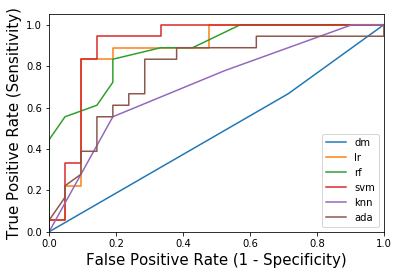

In [28]:
fpr_dm, tpr_dm, thresholds_dm = metrics.roc_curve(Y_train_class, data_ave_features['dm_cv_ave']['y_pred_prob'][:,1])
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(Y_train_class, data_ave_features['lr_cv_ave']['y_pred_prob'][:,1])
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(Y_train_class, data_ave_features['rf_cv_ave']['y_pred_prob'][:,1])
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(Y_train_class, data_ave_features['svm_cv_ave']['y_pred_prob'][:,1])
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(Y_train_class, data_ave_features['knn_cv_ave']['y_pred_prob'][:,1])
fpr_ab, tpr_ab, thresholds_ab = metrics.roc_curve(Y_train_class, data_ave_features['ab_cv_ave']['y_pred_prob'][:,1])

# plot model ROC curves
plt.plot(fpr_dm, tpr_dm, label="dm")
plt.plot(fpr_lr, tpr_lr, label="lr")
plt.plot(fpr_rf, tpr_rf, label="rf")
plt.plot(fpr_svm, tpr_svm, label="svm")
plt.plot(fpr_knn, tpr_knn, label="knn")
plt.plot(fpr_ab, tpr_ab, label="ada")

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 15)

Text(0,0.5,'Precision')

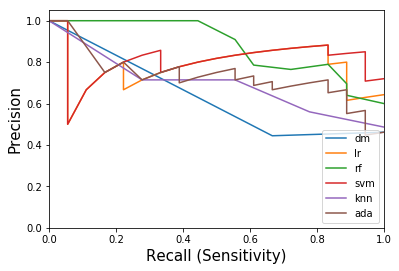

In [29]:
# calculate precision-recall curve
precision_dm, recall_dm, thresholds_pr_dm = metrics.precision_recall_curve(Y_train_class, data_ave_features['dm_cv_ave']['y_pred_prob'][:,1])
precision_lr, recall_lr, thresholds_pr_lr = metrics.precision_recall_curve(Y_train_class, data_ave_features['lr_cv_ave']['y_pred_prob'][:,1])
precision_rf, recall_rf, thresholds_pr_rf = metrics.precision_recall_curve(Y_train_class, data_ave_features['rf_cv_ave']['y_pred_prob'][:,1])
precision_svm, recall_svm, thresholds_pr_svm = metrics.precision_recall_curve(Y_train_class, data_ave_features['svm_cv_ave']['y_pred_prob'][:,1])
precision_knn, recall_knn, thresholds_pr_knn = metrics.precision_recall_curve(Y_train_class, data_ave_features['knn_cv_ave']['y_pred_prob'][:,1])
precision_ab, recall_ab, thresholds_pr_ab = metrics.precision_recall_curve(Y_train_class, data_ave_features['ab_cv_ave']['y_pred_prob'][:,1])

plt.plot(recall_dm, precision_dm, label='dm')
plt.plot(recall_lr, precision_lr, label='lr')
plt.plot(recall_rf, precision_rf, label='rf')
plt.plot(recall_svm, precision_svm, label='svm')
plt.plot(recall_knn, precision_knn, label='knn')
plt.plot(recall_ab, precision_ab, label='ada')

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('Recall (Sensitivity)', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)

In [32]:
#scale data for grid search
train_scaled = scaler.fit_transform(X_train_ave)

#grid search with cv for svm and ave features
param_grid = {'C':(0.001, 0.01, 0.1, 1, 10), 'decision_function_shape':('ovo','ovr'), 'kernel':('linear', 'rbf')}
scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

svm_base = SVC(class_weight='balanced', random_state=39)

svm_gs = GridSearchCV(svm_base, param_grid, cv=3, scoring = scoring, refit='f1')
svm_gs.fit(train_scaled, Y_train_class)

print("f1:"+str(np.average(cross_val_score(svm_gs, train_scaled, Y_train_class, scoring='f1'))))
print("ROC_AUC:"+str(np.average(cross_val_score(svm_gs, train_scaled, Y_train_class, scoring='roc_auc'))))

print(svm_gs.best_params_)

f1:0.8614718614718614
ROC_AUC:0.9126984126984127
{'C': 1, 'decision_function_shape': 'ovo', 'kernel': 'linear'}


In [35]:
#use best params

svm_best = SVC(probability=True, kernel='linear', class_weight='balanced', C=1, decision_function_shape='ovo', random_state=39)
    
print("f1:"+str(np.average(cross_val_score(svm_best, train_scaled, Y_train_class, scoring='f1'))))
print("ROC_AUC:"+str(np.average(cross_val_score(svm_best, train_scaled, Y_train_class, scoring='roc_auc'))))
print("Accuracy:"+str(np.average(cross_val_score(svm_best, train_scaled, Y_train_class, scoring='accuracy'))))

svm_best.fit(train_scaled, Y_train_class)
print(svm_best.score(train_scaled, Y_train_class))

train_pred_svm = svm_best.predict(train_scaled)
train_pred_prob_svm = svm_best.predict_proba(train_scaled)
print(classification_report(Y_train_class, train_pred_svm))
print(confusion_matrix(Y_train_class, train_pred_svm))

f1:0.8600732600732601
ROC_AUC:0.9206349206349206
Accuracy:0.8717948717948718
0.9230769230769231
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.89      0.94      0.92        18

   micro avg       0.92      0.92      0.92        39
   macro avg       0.92      0.92      0.92        39
weighted avg       0.92      0.92      0.92        39

[[19  2]
 [ 1 17]]


In [36]:
#run on test data
#scale data
test_scaled = scaler.fit_transform(X_test_ave)

print('SVM test AUC: {}'.format(svm_best.score(test_scaled, Y_test_class)))
test_pred_svm = svm_best.predict(test_scaled)
test_pred_prob_svm = svm_best.predict_proba(test_scaled)
print(classification_report(Y_test_class, test_pred_svm))
print(confusion_matrix(Y_test_class, test_pred_svm))

SVM test AUC: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.88      0.78      0.82         9

   micro avg       0.83      0.83      0.83        18
   macro avg       0.84      0.83      0.83        18
weighted avg       0.84      0.83      0.83        18

[[8 1]
 [2 7]]


In [ ]:
#grid search with cv for rf and full features

param_grid = { 
    'n_estimators': [5, 10, 50, 100, 500],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,None],
    'criterion' :['gini', 'entropy'],
    'bootstrap': [True, False]
}

scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

rf_base = RandomForestClassifier(class_weight='balanced', random_state=39)

rf_gs = GridSearchCV(rf_base, param_grid, cv=3, scoring = scoring, refit='f1')
rf_gs.fit(train_scaled, Y_train_class)

print("f1:"+str(np.average(cross_val_score(rf_gs, train_scaled, Y_train_class, scoring='f1'))))
print("ROC_AUC:"+str(np.average(cross_val_score(rf_gs, train_scaled, Y_train_class, scoring='roc_auc'))))

print(rf_gs.best_params_)

In [ ]:
#use best params

rf_best = RandomForestClassifier(class_weight='balanced', random_state=39)

print("f1:"+str(np.average(cross_val_score(rf_best, train_scaled, Y_train_class, scoring='f1'))))
print("ROC_AUC:"+str(np.average(cross_val_score(rf_best, train_scaled, Y_train_class, scoring='roc_auc'))))
print("Accuracy:"+str(np.average(cross_val_score(rf_best, train_scaled, Y_train_class, scoring='accuracy'))))

rf_best.fit(train_scaled, Y_train_class)
print(svm_best.score(train_scaled, Y_train_class))

train_pred_rf = rf_best.predict(train_scaled)
train_pred_prob_rf = rf_best.predict_proba(train_scaled)
print(classification_report(Y_train_class, train_pred_rf))
print(confusion_matrix(Y_train_class, train_pred_rf))

In [ ]:
#run on test data
#scale data
test_scaled = scaler.fit_transform(X_test_ave)

print('RF test AUC: {}'.format(rf_best.score(test_scaled, Y_test_class)))
test_pred_rf = rf_best.predict(test_scaled)
test_pred_prob_rf = rf_best.predict_proba(test_scaled)
print(classification_report(Y_test_class, test_pred_rf))
print(confusion_matrix(Y_test_class, test_pred_rf))

### Unsupervised clustering

In [42]:
features_cluster = data[['infusions_day1',
       'infusions_day2', 'infusions_day3', 'infusions_day4',
       'infusions_day5', 'loading_day1', 'loading_day2', 'loading_day3',
       'loading_day4', 'loading_day5', 'taking_day1', 'taking_day2',
       'taking_day3', 'taking_day4', 'taking_day5', 'seeking_day1',
       'seeking_day2', 'seeking_day3', 'seeking_day4', 'seeking_day5',
       'first_day1', 'first_day2', 'first_day3', 'first_day4',
       'first_day5', 'latency_day1', 'latency_day2', 'latency_day3',
       'latency_day4', 'latency_day5', 'interval_day1', 'interval_day2',
       'interval_day3', 'interval_day4', 'interval_day5']]

# center and scale the data
scaler = StandardScaler()

features_clust_scaled = scaler.fit_transform(features_cluster)

Text(0,0.5,'Silhouette Coefficient')

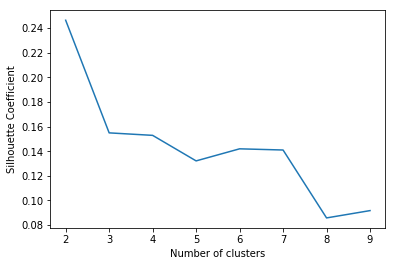

In [43]:
k_range = range(2,10)
scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(features_clust_scaled)
    scores.append(silhouette_score(features_clust_scaled, km_ss.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

In [44]:
km2 = KMeans(n_clusters=2,random_state=1234)
km2.fit(features_clust_scaled)
data['kmeans_2_scaled'] = [ "cluster_" + str(label) for label in km2.labels_ ]
data.groupby('kmeans_2_scaled').mean()

,Subject,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,class,infusions_ave,loading_ave,taking_ave,seeking_ave,first_ave,latency_ave,interval_ave
kmeans_2_scaled,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cluster_0,82.600000,-3.837710,1.333333,1.666667,3.533333,2.666667,5.533333,0.533333,0.666667,2.733333,1.266667,1.866667,0.866667,1.933333,3.800000,4.133333,2.466667,12.800000,6.933333,5.200000,13.400000,11.066667,2028.210667,2116.607333,1341.960667,1175.292000,928.964667,208.913333,213.804111,168.173556,180.516889,111.283489,222.967667,202.580667,176.296256,159.932222,114.224944,0.133333,2.946667,1.413333,2.640000,9.880000,1518.207067,176.538276,175.200351
cluster_1,98.809524,1.320299,5.738095,8.976190,14.595238,20.857143,23.404762,2.595238,3.500000,4.023810,5.000000,6.142857,2.547619,3.976190,5.690476,7.119048,8.380952,20.714286,23.642857,32.738095,47.714286,45.595238,397.706429,161.485476,89.160952,48.710952,42.582143,112.298921,100.550449,102.612431,81.344038,75.058173,69.951466,38.379520,38.077965,19.287163,21.551859,0.595238,14.714286,4.252381,5.542857,34.080952,147.929190,94.372802,37.449594


In [45]:
data.groupby('Severity')['kmeans_2_scaled'].value_counts()

Severity  kmeans_2_scaled
high      cluster_1          25
          cluster_0           2
low       cluster_1          17
          cluster_0          13
Name: kmeans_2_scaled, dtype: int64